In [1]:
import pandas as pd
import numpy as np
import ast
from IPython.display import display

In [2]:
df = pd.read_csv('iot23.txt', sep=';')

In [3]:
max_acc = max(df['Source Accuracy'])
user_thres = [0, 0.01, 0.03, 0.1, 0.3, 1]
src_thres = [max_acc * (1-x) for x in user_thres]
src_thres, user_thres

([0.9990806377470786,
  0.9890898313696078,
  0.9691082186146662,
  0.8991725739723707,
  0.6993564464229549,
  0.0],
 [0, 0.01, 0.03, 0.1, 0.3, 1])

In [4]:
df['Number of Features'] = df['Features'].apply(lambda x: len(ast.literal_eval(x)))
df[df['Source Accuracy']>=src_thres[1]]

,Features,Source Accuracy,Threat Accuracy,Number of Features
5,[6],0.996274,0.714707,1
6,"[6, 8]",0.996347,0.714828,2
7,"[6, 7]",0.996347,0.714804,2
8,"[6, 7, 8]",0.996347,0.714828,3
9,[5],0.990540,0.698062,1
...,...,...,...,...
507,"[0, 1, 2, 3, 4, 5, 7, 8]",0.999008,0.762708,8
508,"[0, 1, 2, 3, 4, 5, 6]",0.999032,0.779813,7
509,"[0, 1, 2, 3, 4, 5, 6, 8]",0.999032,0.779813,8
510,"[0, 1, 2, 3, 4, 5, 6, 7]",0.999032,0.779813,8


In [6]:
import os
filename = os.path.basename(globals()['__session__'])
results_list = []

for src_t, user_t in zip(src_thres, user_thres):
    # print("Source Accuracy Threshold:", src_t)
    # print(User Threshold:", user_t)
    
    # Filter rows based on source accuracy threshold
    filtered_df = df[df['Source Accuracy'] >= src_t]
    
    # Find the lowest threat accuracy
    min_threat_accuracy = filtered_df['Threat Accuracy'].min()
    
    # Filter rows with similar threat accuracy (<1% difference)
    similar_threat_rows = filtered_df[
        (filtered_df['Threat Accuracy'] >= min_threat_accuracy) & 
        (filtered_df['Threat Accuracy'] <= min_threat_accuracy * 1.01)
    ]
    
    # Find the row with the minimum number of features among these rows
    # min_feats = similar_threat_rows['Number of Features'].min()
    # result = similar_threat_rows[similar_threat_rows['Number of Features'] <= min_feats+1]
    
    # Sort and select the row with minimum threat accuracy
    selected_row = similar_threat_rows.sort_values(by='Threat Accuracy').iloc[0]
    
    # Append result to list
    results_list.append([
        user_t,
        selected_row['Source Accuracy'],
        selected_row['Threat Accuracy'],
        selected_row['Number of Features']
    ])

columns = ['Threshold', 'Source Accuracy', 'Threat Accuracy', f"# Features (Max {max(df['Number of Features'])})"]
result_df = pd.DataFrame(results_list, columns=columns)
result_df.to_csv(filename + '.csv', index=False)

Source Accuracy Threshold: 0.9990806377470786
Source Accuracy Threshold: 0.9965806377470786
Source Accuracy Threshold: 0.9940806377470786
Source Accuracy Threshold: 0.9890806377470786
Source Accuracy Threshold: 0.9840806377470785
Source Accuracy Threshold: 0.9790806377470785
Source Accuracy Threshold: 0.9740806377470785
Source Accuracy Threshold: 0.9690806377470785


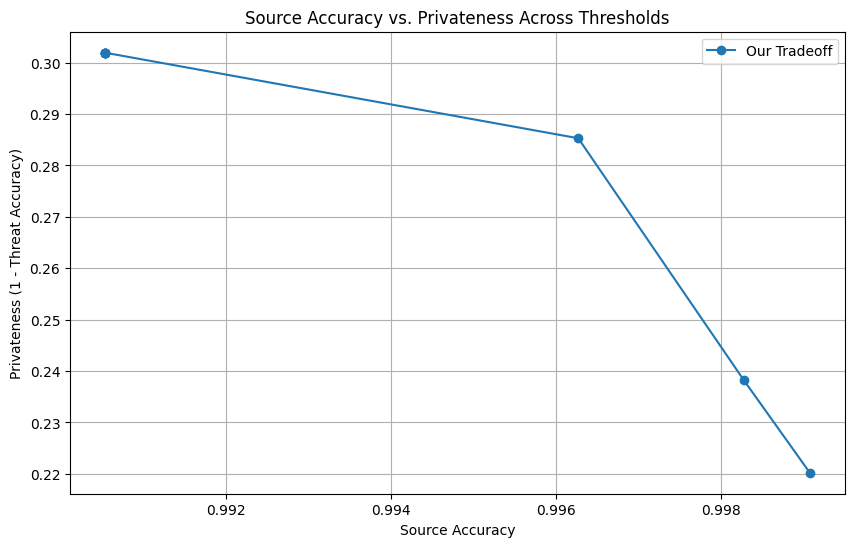

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect results for plotting
plot_data = []

for src_t in src_thres:
    print("Source Accuracy Threshold:", src_t)
    
    # Filter rows based on source accuracy threshold
    filtered_df = df[df['Source Accuracy'] >= src_t]
    
    # Find the lowest threat accuracy
    min_threat_accuracy = filtered_df['Threat Accuracy'].min()
    
    # Filter rows with similar threat accuracy (<1% difference)
    similar_threat_rows = filtered_df[
        (filtered_df['Threat Accuracy'] >= min_threat_accuracy) & 
        (filtered_df['Threat Accuracy'] <= min_threat_accuracy * 1.01)
    ]
    
    # Find the row with the minimum number of features among these rows
    min_feats = similar_threat_rows['Number of Features'].min()
    result = similar_threat_rows[similar_threat_rows['Number of Features'] <= min_feats+1]
    
    # Select the first data point for the current threshold
    if not result.empty:
        first_row = result.iloc[0]
        plot_data.append({
            'Source Accuracy': first_row['Source Accuracy'],
            'Privateness': 1 - first_row['Threat Accuracy'],
            'Threshold': src_t
        })

# Convert collected data to a DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(plot_df['Source Accuracy'], plot_df['Privateness'], marker='o', label='Our Tradeoff')
    
plt.xlabel('Source Accuracy')
plt.ylabel('Privateness (1 - Threat Accuracy)')
plt.title('Source Accuracy vs. Privateness Across Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
for src_t in src_thres:
    print("Source Accuracy Threshold:", src_t)
    min_feats = min(df[df['Source Accuracy']>=src_t]['Number of Features'])
    display(df[(df['Source Accuracy']>=src_t) & (df['Number of Features']==min_feats)].sort_values(by='Threat Accuracy'))

Source Accuracy Threshold: 0.9990806377470786


,Features,Source Accuracy,Threat Accuracy,Number of Features
364,"[0, 2, 3, 5, 6]",0.999081,0.779789,5
372,"[0, 2, 3, 4, 6]",0.999081,0.779789,5


Source Accuracy Threshold: 0.9965806377470786


,Features,Source Accuracy,Threat Accuracy,Number of Features
264,"[0, 5]",0.998282,0.761813,2
260,"[0, 6]",0.998548,0.779522,2


Source Accuracy Threshold: 0.9940806377470786


,Features,Source Accuracy,Threat Accuracy,Number of Features
5,[6],0.996274,0.714707,1


Source Accuracy Threshold: 0.9890806377470786


,Features,Source Accuracy,Threat Accuracy,Number of Features
9,[5],0.990540,0.698062,1
5,[6],0.996274,0.714707,1


Source Accuracy Threshold: 0.9840806377470785


,Features,Source Accuracy,Threat Accuracy,Number of Features
9,[5],0.990540,0.698062,1
5,[6],0.996274,0.714707,1


Source Accuracy Threshold: 0.9790806377470785


,Features,Source Accuracy,Threat Accuracy,Number of Features
9,[5],0.990540,0.698062,1
5,[6],0.996274,0.714707,1


Source Accuracy Threshold: 0.9740806377470785


,Features,Source Accuracy,Threat Accuracy,Number of Features
9,[5],0.990540,0.698062,1
5,[6],0.996274,0.714707,1


Source Accuracy Threshold: 0.9690806377470785


,Features,Source Accuracy,Threat Accuracy,Number of Features
9,[5],0.990540,0.698062,1
5,[6],0.996274,0.714707,1
256,[0],0.971403,0.734449,1
